In [5]:
%cd ../

/home/edward/sprites


In [2]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:
import numpy as np
import torch
from einops import rearrange

In [6]:
from src.model.tiny_autoencoder import TinyAutoencoder
from src.dataset.sprites_dataset import SpritesDataset

In [7]:
checkpoint_path = "checkpoints/sprites_tiny-autoencoder_video/crusher-space-16/checkpoint_at_step_6520.pth"
assert os.path.exists(checkpoint_path)

In [8]:
model = TinyAutoencoder()
model.load_state_dict(torch.load(checkpoint_path))


<All keys matched successfully>

In [9]:
dataset = SpritesDataset()

In [10]:
vid1 = random.choice(dataset)
vid2 = random.choice(dataset)
model_input = torch.stack([vid1, vid2])

In [36]:
with torch.no_grad():
    latents = model.encoder(model_input)
    latents = torch.stack([
        latents[0],
        latents[1],
        torch.flip(latents[0], dims=[0]),
        torch.mean(latents, dim=0),
    ])
    output_vids = model.sigmoid(
        model.decoder(latents),
    )
latents.shape

torch.Size([4, 4, 1, 8, 8])

In [37]:
def prep_vid_for_preview(vid: torch.Tensor) -> np.ndarray:
    vid = rearrange(vid, 'c t h w -> t h w c')
    vid = (vid * 255).to(torch.uint8)
    return vid.cpu().detach().numpy()

output_vid1 = prep_vid_for_preview(output_vids[0])
output_vid2 = prep_vid_for_preview(output_vids[1])
output_vid3 = prep_vid_for_preview(output_vids[2])
output_vid4 = prep_vid_for_preview(output_vids[3])


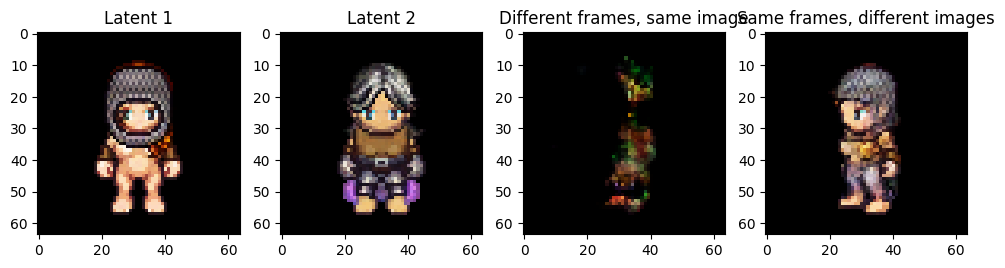

In [38]:
# show 2x2 grid of videos
fig, axs = plt.subplots(1, 4, figsize=(12, 4))
axs[0].imshow(output_vid1[2])
axs[1].imshow(output_vid2[2])
axs[2].imshow(output_vid3[0])
axs[3].imshow(output_vid4[1])
# title the images
axs[0].set_title("Latent 1")
axs[1].set_title("Latent 2")
axs[2].set_title("Different frames, same image")
axs[3].set_title("Same frames, different images")
plt.show()